<a href="https://colab.research.google.com/github/clovestad/project2_pt1/blob/main/Solar_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Output of solar energy
1. Source of data
  - https://www.kaggle.com/datasets/anikannal/solar-power-generation-data
2. Brief description of data
  - This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

3. What is the target?
  - daily yeild of power and the difference in efficiency between inverters on a daily and monthly period.

4. What does one row represent?
  - a solar inverter to invert DC power to AC power

5. Is this a classification or regression problem?
  - regression

6. How many features does the data have?
  - 7

7. How many rows are in the dataset?
  - 68778



### Task
- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
fpath= '/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/02-MachineLearning/Week07/Data/Plant_1_Generation_Data.csv'
df=pd.read_csv(fpath)
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


- DATE_TIME and PLANT_ID do not present themsevles ad necessary to obtain yeild power production values.

In [44]:
df=df.drop(columns = ['DATE_TIME','PLANT_ID'])
df.head()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


- Check for duplicates

In [45]:
df.duplicated().sum()

30286

In [46]:
duplicated_rows = df.duplicated(keep=False)
df[duplicated_rows]

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...
68772,sjndEbLyjtCKgGv,0.0,0.0,5887.0,7261681.0
68773,uHbuxQJl8lW7ozc,0.0,0.0,5967.0,7287002.0
68775,z9Y9gH1T5YWrNuG,0.0,0.0,5819.0,7251204.0
68776,zBIq5rxdHJRwDNY,0.0,0.0,5817.0,6583369.0


- there are 22 unique inverters inverting power recoded at increments of 15 minutes so the massive amout of duplicates is warranted

In [47]:
df.select_dtypes('object').nunique()

SOURCE_KEY    22
dtype: int64

In [48]:
df.select_dtypes('float').nunique()

DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64

In [49]:
for col in df:
  print(f'Value counts for {col}:')
  print(df[col].value_counts())
  print('\n')

Value counts for SOURCE_KEY:
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64


Value counts for DC_POWER:
0.000000       31951
66.000000          7
26.000000          5
5357.000000        5
78.857143          5
               ...  
2133.000000        1
1849.428571        1
1889.750000        1
1888.375000        1
74.857143          1
Name: DC_POWER, Length: 32909, dtype: int64


Value counts for AC_POWER:
0.000000      31951
67.485714         6
35.700000         5
10.900000         5

In [50]:
for col in df:
  print(f'nulls for {col}:')
  print(df[col].isna().sum())
  print('\n')

nulls for SOURCE_KEY:
0


nulls for DC_POWER:
0


nulls for AC_POWER:
0


nulls for DAILY_YIELD:
0


nulls for TOTAL_YIELD:
0




- rename inverters to easily identify during modeling

In [51]:
df['SOURCE_KEY']= df['SOURCE_KEY'].replace({'bvBOhCH3iADSZry':1,
                                            '1BY6WEcLGh8j5v7':2,
                                            '7JYdWkrLSPkdwr4':3,
                                            'VHMLBKoKgIrUVDU':4,
                                            'ZnxXDlPa8U1GXgE':5,
                                            'ih0vzX44oOqAx2f':6,
                                            'z9Y9gH1T5YWrNuG':7,
                                            'wCURE6d3bPkepu2':8,
                                            'uHbuxQJl8lW7ozc':9,
                                            'pkci93gMrogZuBj':10,
                                            'iCRJl6heRkivqQ3':11,
                                            'rGa61gmuvPhdLxV':12,
                                            'sjndEbLyjtCKgGv':13,
                                            'McdE0feGgRqW7Ca':14,
                                            'zVJPv84UY57bAof':15,
                                            'ZoEaEvLYb1n2sOq':16,
                                            '1IF53ai7Xc0U56Y':17,
                                            'adLQvlD726eNBSB':18,
                                            'zBIq5rxdHJRwDNY':19,
                                            'WRmjgnKYAwPKWDb':20,
                                            '3PZuoBAID5Wc2HD':21,
                                            'YxYtjZvoooNbGkE':22})

In [52]:
df = df.set_index('SOURCE_KEY')


In [53]:
df.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
SOURCE_KEY,,,,
2,0.0,0.0,0.0,6259559.0
17,0.0,0.0,0.0,6183645.0
21,0.0,0.0,0.0,6987759.0
3,0.0,0.0,0.0,7602960.0
14,0.0,0.0,0.0,7158964.0


## visuals

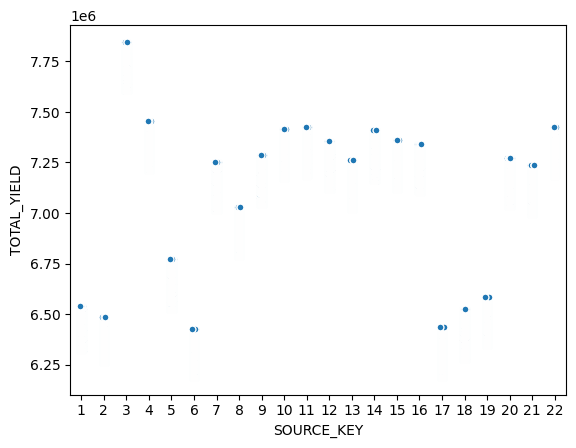

In [54]:
import seaborn as sns
ax = sns.stripplot(data=df, x='SOURCE_KEY', y='TOTAL_YIELD', edgecolor='white', linewidth=1)

- High cardinality of value source key expected as they represent the 22 individual units generating power to compare statistics to one another.
- visualization  shows no difinitive correlation  up or down but  a median floating around 7.25KW total yield.

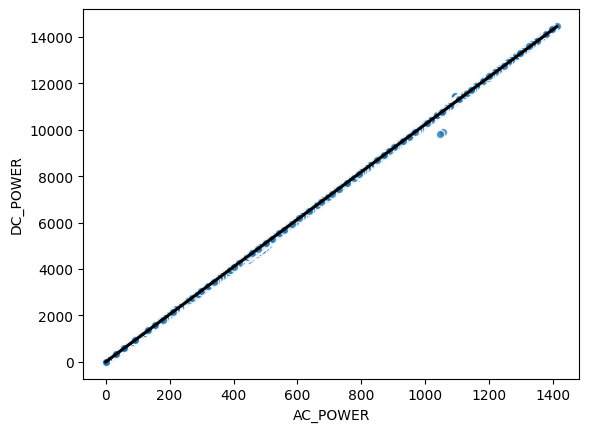

In [55]:
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data=df, x='AC_POWER', y="DC_POWER",
                 line_kws=line_kws, scatter_kws=scatter_kws);

- visualization depicts the correlation of AC_power to DC_power  at a factor of DC = 10 x AC with only a few outliers defying the trend line.

### obtain correlations to continue data exploration.

In [56]:
corr = df.corr()
corr.round(2)

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DC_POWER,1.00,1.00,0.08,0.00
AC_POWER,1.00,1.00,0.08,0.00
DAILY_YIELD,0.08,0.08,1.00,0.01
TOTAL_YIELD,0.00,0.00,0.01,1.00


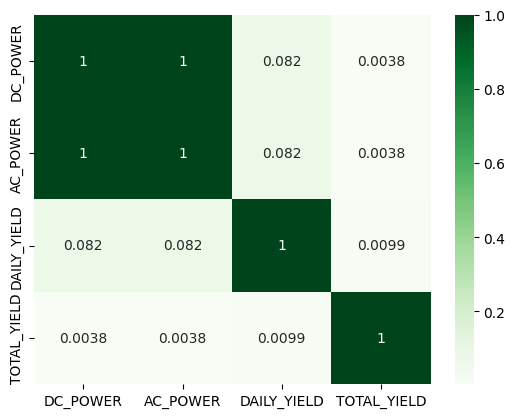

In [57]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

Text(0.5, 0, 'Inverter Number')

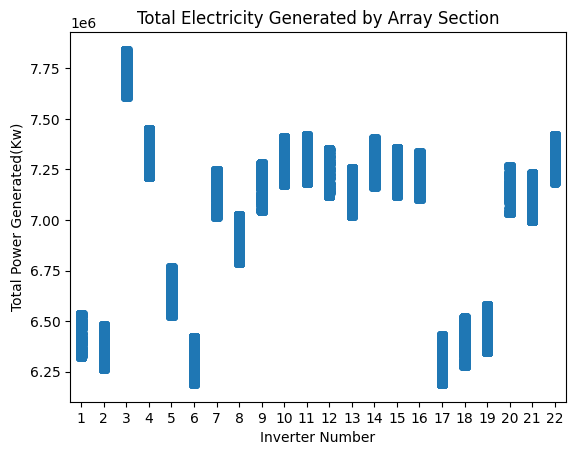

In [69]:
ax = sns.stripplot(data=df, x='SOURCE_KEY', y='TOTAL_YIELD',  )
ax.set_title('Total Electricity Generated by Array Section')
ax.set_ylabel('Total Power Generated(Kw)')
ax.set_xlabel('Inverter Number')

- the above plot relates a majority of the inverters maintaining and steady output of 7.25Kw on a montly total output with a few inverters indicating inefficiencies that COULD effect overall plant performance/generation and should be noted for maintnience or replacement.

<ipython-input-68-f489361276c9>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x='SOURCE_KEY', y='DAILY_YIELD',palette="deep")


Text(0.5, 0, 'Inverter Number')

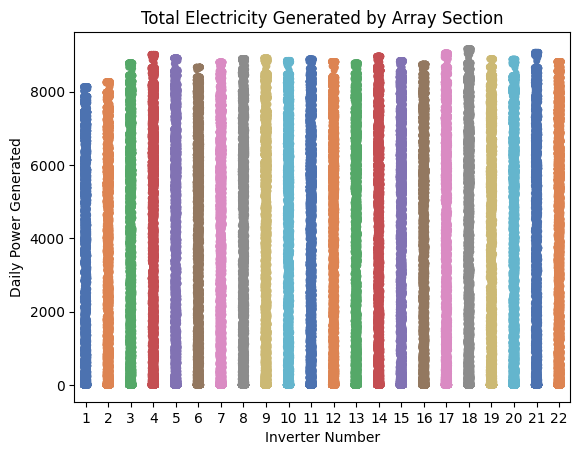

In [68]:
ax = sns.stripplot(data=df, x='SOURCE_KEY', y='DAILY_YIELD',palette="deep")
ax.set_title('Total Electricity Generated by Array Section')
ax.set_ylabel('Daily Power Generated(W)')
ax.set_xlabel('Inverter Number')

- Daily power generation indicates a more even disrtribution of generation between inverters ,returning the indication in the previous visualization that the lower producing inverters  were not perfroming efficiently as false(minimal amount of downtime is permissable for maintnience/updates).